## Data loading(Ignore)

In [28]:
import pandas as pd
from collections import Counter
from snownlp import SnowNLP, sentiment
import matplotlib.pyplot as plt
import jieba
import json
import os



In [3]:
# Load the CSV file into a DataFrame
df1 = pd.read_csv("weibo_107_1022.csv")
df2 = pd.read_csv("weibo_1023_117.csv")

In [6]:
# df1 select timezone
df1['发布时间'] = pd.to_datetime(df1['发布时间'])

start_date = "2023-10-07"
end_date = "2023-10-23"

filtered_df1 = df1[(df1['发布时间'] >= start_date) & (df1['发布时间'] <= end_date)]


# df2 select time zone
df2['发布时间'] = pd.to_datetime(df2['发布时间'])

start_date = "2023-10-22"
end_date = "2023-11-8"

filtered_df2 = df2[(df2['发布时间'] >= start_date) & (df2['发布时间'] <= end_date)]


In [7]:
# check dataset by date
filtered_df1['date'] = filtered_df1['发布时间'].dt.date

daily_counts = filtered_df1.groupby('date').size().reset_index(name='weibo_count')

print(daily_counts)

          date  weibo_count
0   2023-10-07         1426
1   2023-10-08          757
2   2023-10-09          445
3   2023-10-10          373
4   2023-10-11          335
5   2023-10-12          315
6   2023-10-13          375
7   2023-10-14           20
8   2023-10-15          304
9   2023-10-16         2333
10  2023-10-17          212
11  2023-10-18          520
12  2023-10-19          105
13  2023-10-20           62
14  2023-10-21         2203
15  2023-10-22          575
16  2023-10-23            2


/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_71002/411688206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['date'] = filtered_df1['发布时间'].dt.date


In [8]:
# remove 2023-10-23
filtered_df1 = filtered_df1[filtered_df1['发布时间'].dt.date != pd.to_datetime('2023-10-23').date()]

daily_counts = filtered_df1.groupby('date').size().reset_index(name='weibo_count')

print(daily_counts)

          date  weibo_count
0   2023-10-07         1426
1   2023-10-08          757
2   2023-10-09          445
3   2023-10-10          373
4   2023-10-11          335
5   2023-10-12          315
6   2023-10-13          375
7   2023-10-14           20
8   2023-10-15          304
9   2023-10-16         2333
10  2023-10-17          212
11  2023-10-18          520
12  2023-10-19          105
13  2023-10-20           62
14  2023-10-21         2203
15  2023-10-22          575


In [9]:
filtered_df2['date'] = filtered_df2['发布时间'].dt.date

daily_counts = filtered_df2.groupby('date').size().reset_index(name='weibo counts')

print(daily_counts)

          date  weibo counts
0   2023-10-23          2984
1   2023-10-24          2399
2   2023-10-25           702
3   2023-10-26           118
4   2023-10-27            86
5   2023-10-28           188
6   2023-10-29           129
7   2023-10-30            94
8   2023-10-31           101
9   2023-11-01           107
10  2023-11-02           142
11  2023-11-03           121
12  2023-11-04           102
13  2023-11-05           100
14  2023-11-06            64
15  2023-11-07            85


/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_71002/2981379858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['date'] = filtered_df2['发布时间'].dt.date


In [ ]:
# merge df1 and df2
merged_df = pd.concat([filtered_df1, filtered_df2], ignore_index=True)

merged_df.head()

In [ ]:
# setup dataframe

weibo_data = pd.DataFrame(index=merged_df.index)
weibo_data["id"] = merged_df["id"]
weibo_data["content"] = merged_df["微博正文"]
weibo_data["topic"] = merged_df["话题"]
weibo_data["retweet"] = merged_df["转发数"]
weibo_data["comments"] = merged_df["评论数"]
weibo_data["likes"] = merged_df["点赞数"]
weibo_data["ip"] = merged_df["ip"]
weibo_data['date'] = merged_df['发布时间'].dt.date
weibo_data['user_authentication'] = merged_df['user_authentication']

weibo_data.to_csv('weibo_reddit_dataset/weibo_datset_cn')

# Start from here : Data Cleaning and basic Data description

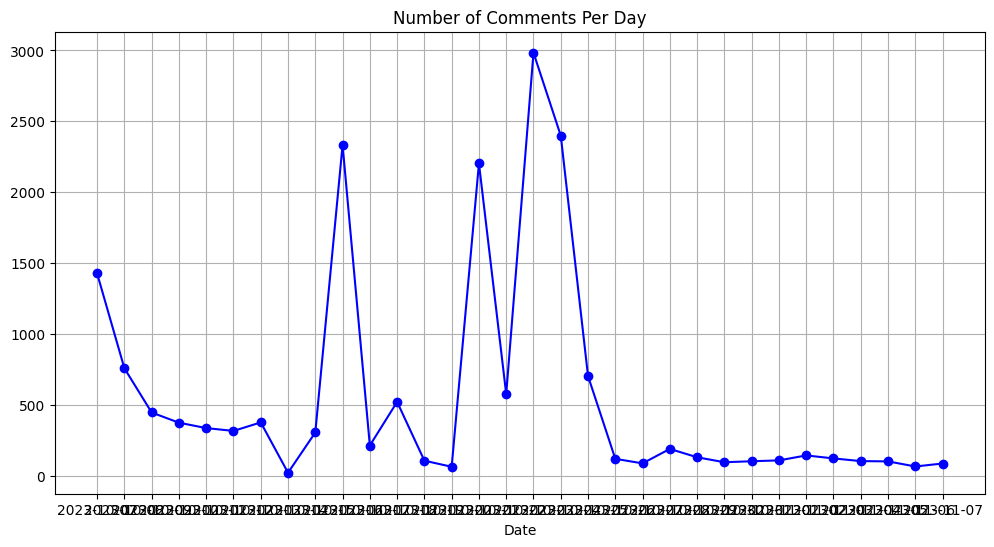

In [34]:
weibo_data = pd.read_csv('weibo_reddit_dataset/weibo_datset_cn')

# line plot of the number of comments day by day

daily_comments = weibo_data.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_comments.index, daily_comments.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.title('Number of Comments Per Day')
plt.grid(True)
plt.show()

In [17]:
# content preprocessing

def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return set(line.strip() for line in file)


stopwords = load_stopwords('cn_stopwords.txt')

def preprocess(text):
    
    text = text.replace("##", "")

    tokens = jieba.cut(text)
    
    tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
    
    return tokens

weibo_data['tokens'] = weibo_data['content'].apply(preprocess)
weibo_data['clean_text'] = weibo_data['tokens'].apply(lambda x: ' '.join(x))


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/jieba.cache
Loading model cost 0.362 seconds.
Prefix dict has been built successfully.


In [18]:
# optinal
# replace 'palestines' with 'palestine'
def normalize_text(text):
    text = text.replace('巴勒斯坦人', '巴勒斯坦')
    return text

def tokenize(text):

    tokens = jieba.cut(text)
    
    return tokens

weibo_data['normalized_content'] = weibo_data['clean_text'].apply(normalize_text)
weibo_data['nom_tokens'] = weibo_data['normalized_content'].apply(tokenize)

## Filter Data Based on Specific Topics

In [ ]:
# generate related topics
'''
weibo_data['topic'] = weibo_data['topic'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)
# Flatten the list of lists to get all unique topics
all_topics = set([topic for sublist in weibo_data['topic'] for topic in sublist])

print("Unique topics found:")
print(all_topics)
'''

In [21]:
# Filter Data Based on Specific Topics

with open('specific_topics.json', 'r', encoding='utf-8') as f:
    loaded_specific_topics = json.load(f)

# Filter the DataFrame to include only rows where the specific topic is mentioned
weibo_data['topic'] = weibo_data['topic'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)
topic_filtered_df = weibo_data[weibo_data['topic'].apply(lambda topic_list: any(topic in topic_list for topic in loaded_specific_topics))]

## Sample 300 training dataset

In [22]:
# Select only the 'content' column
df_content = topic_filtered_df[['content']]

# Sample 300 entries from the 'content' column
sampled_content_df = df_content.sample(n=300, random_state=42)
sampled_content_df.reset_index(drop=True, inplace=True)

# save this sample to a new CSV file
# sampled_content_df.to_csv('sampled_content.csv', index=False)

# save this sample to a new excel file
#sampled_content_df.to_excel('sentiment_statistics.xlsx', index=False)

In [25]:
'''
# load the training dataset

train_data = pd.read_excel('/Users/zhouyanqing/Desktop/train_sentiment.xlsx') 

# Prepare negative and positive samples
df_content = train_data[['content', 'emotion']]
neg_content = df_content[df_content['emotion'] == -1]['content']
pos_content = df_content[df_content['emotion'] == 1]['content']

# Save negative samples to neg.txt
with open('neg.txt', 'w', encoding='utf-8') as f:
    for text in neg_content:
        f.write(f"{text}\n")

# Save positive samples to pos.txt
with open('pos.txt', 'w', encoding='utf-8') as f:
    for text in pos_content:
        f.write(f"{text}\n")
'''

# Train the sentiment analysis model
sentiment.train('neg.txt', 'pos.txt')

# Save the trained model
sentiment.save('sentiment.marshal')


## Word frequency

In [27]:
# Flatten the list of tokens into a single list
all_tokens = [token for sublist in topic_filtered_df['tokens'] for token in sublist]

# Calculate word frequencies using Counter
word_freq = Counter(all_tokens)

# Calculate the total number of tokens
total_tokens = sum(word_freq.values())

# Convert the word frequency dictionary into a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

# Calculate the relative frequency and add it to the DataFrame
word_freq_df['relative_frequency'] = word_freq_df['frequency'] / total_tokens

# Sort by frequency (optional)
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Export to CSV
word_freq_df.to_csv('results/cn_weibo_word_frequency_0.csv', index=False)

# Display the top 10 words with their frequencies and relative frequencies (optional)
print(word_freq_df.head(10))

    word  frequency  relative_frequency
36   以色列      16237            0.035334
4     冲突      13191            0.028705
90    加沙       8702            0.018937
8     巴以       7399            0.016101
0   巴勒斯坦       6166            0.013418
35    视频       5506            0.011982
34    微博       4647            0.010112
91    地带       4417            0.009612
46   哈马斯       4280            0.009314
39    死亡       4079            0.008876


# Sentiment analysis with the custom-trained model

In [29]:
data_path = 'sentiment.marshal.3'

# Define sentiment analysis function
def analyze_sentiment(text):
    s = SnowNLP(text)
    return s.sentiments

topic_filtered_df['sentiment_score'] = topic_filtered_df['clean_text'].apply(analyze_sentiment)

/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_71002/3483487802.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_filtered_df['sentiment_score'] = topic_filtered_df['clean_text'].apply(analyze_sentiment)


In [30]:
# SnowNLP sentiment score is in the range of 0 to 1，with 1 signifying positive emotion， and 0 signifying negative emotion

def classify_sentiment(score):
    if score > 0.75:
        return "Positive"
    elif score < 0.25:
        return "Negative"
    else:
        return "Neutral"

topic_filtered_df['sentiment'] = topic_filtered_df['sentiment_score'].apply(classify_sentiment)

sentiment_counts = topic_filtered_df.groupby('sentiment').size().reset_index(name='tweet count')
sentiment_counts.to_csv('results/weibo_cn_sentiment_counts.csv', index = False)
print(sentiment_counts)

  sentiment  tweet count
0  Negative         5590
1   Neutral         1886
2  Positive         2110


/var/folders/n2/l02636fd7q11j3gyvhqqs5v80000gn/T/ipykernel_71002/3567294138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_filtered_df['sentiment'] = topic_filtered_df['sentiment_score'].apply(classify_sentiment)


In [31]:
print(topic_filtered_df['sentiment_score'].mean())
print(topic_filtered_df['sentiment_score'].median())

0.32606692410304233
0.12305077684360011
